In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [6]:
# load data to df
df = pd.read_csv(
    r"C:\Users\papak\_Study\DSI\visualization\02_activities\Team\bank\bank-full.csv",
    sep = ";" # specify semicolon as separater
)

# display first 10 rows of df
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [7]:
# Check how many customers subscribed vs. not subscribed 
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [8]:
# Summary statistics
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [9]:
# class balance
df['y'].value_counts(normalize=True)

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

In [10]:
# Check categorical values 
for col in ['job','education','marital','contact','month','poutcome']: 
    print(col, df[col].unique())

job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
education ['tertiary' 'secondary' 'unknown' 'primary']
marital ['married' 'single' 'divorced']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'failure' 'other' 'success']


Correlation & Heatmap

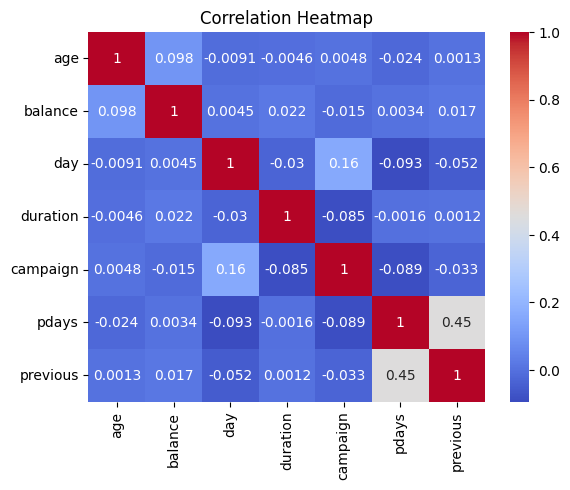

In [18]:
import seaborn as sns
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [25]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Correlation heatmap with target
corr = df_encoded.corr()['y_yes'].sort_values(ascending=False)
print(corr.head(15))  # Top positive correlations
print(corr.tail(15))  # Top negative correlations


y_yes                 1.000000
duration              0.394521
poutcome_success      0.306788
month_mar             0.129456
month_oct             0.128531
month_sep             0.123185
pdays                 0.103621
previous              0.093236
job_retired           0.079245
job_student           0.076897
month_dec             0.075164
education_tertiary    0.066448
marital_single        0.063526
balance               0.052838
month_feb             0.038417
Name: y_yes, dtype: float64
month_jun             -0.016805
job_entrepreneur      -0.019662
default_yes           -0.022419
job_services          -0.027864
day                   -0.028348
month_jul             -0.034382
education_secondary   -0.036388
marital_married       -0.060260
loan_yes              -0.068185
job_blue-collar       -0.072083
campaign              -0.073172
month_may             -0.102500
housing_yes           -0.139173
contact_unknown       -0.150935
poutcome_unknown      -0.167051
Name: y_yes, dtype: float64

Interpretation:
- duration (0.39): moderate positive correlation - longer call are more likely to end in a subscription
- poutcome (0.31): customers who had a successful previous campaign are more likely to subscribe again
- Months(Mar, Oct, Sep): these 3 months has higher success rate --> slight seasonal effect
- Retired & Student: more likely to subscribe
- balance (0.05): very weak correlation. Higher balances may help with subscription success, but not strongly predictive

Less responsive sample:
- housing_yes(-0.139173): Strong negative correlation: people with housing loans less likely to subscribe
- secondary education, blue collar, married people, already have loans, too many campaign contacts and in month of May show lower-probability of subscription
- minimal negative effect:
    - Month: Jun, July
    - Job: Entrepreneur, Service
    - Have credit in default
    - calendar day


Questions - Demographics

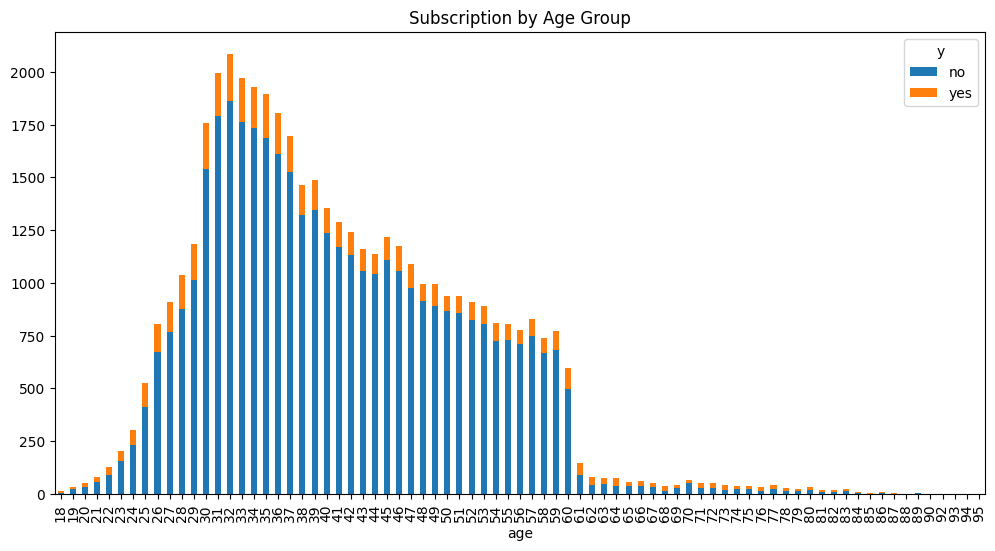

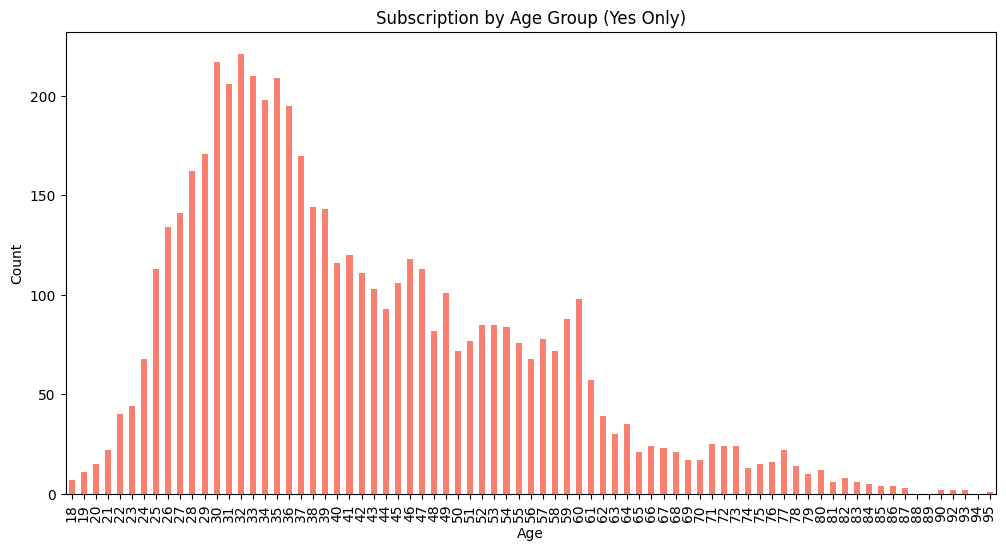

C:\Users\papak\AppData\Local\Temp\ipykernel_29264\3053605857.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot( data=df, x='age_group', y=df['y'].apply(lambda x: 1 if x=='yes' else 0), ci=None )


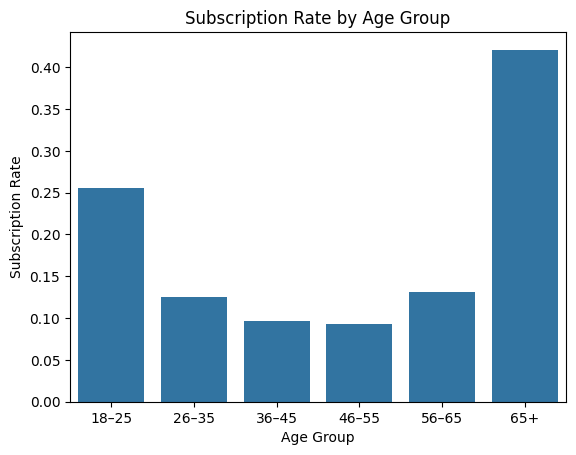

C:\Users\papak\AppData\Local\Temp\ipykernel_29264\3053605857.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


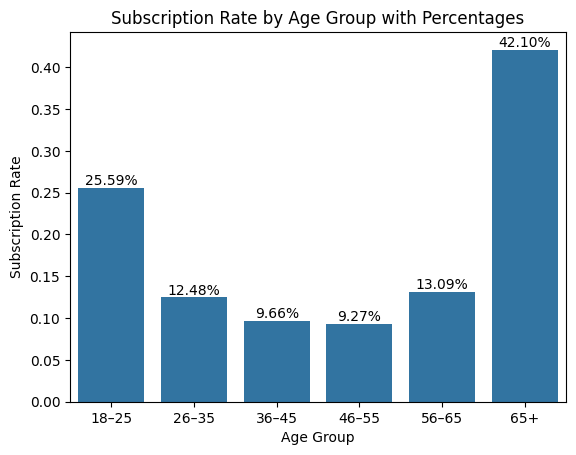

In [ ]:
# Which age groups are most likely to subscribe?
pd.crosstab(df['age'], df['y']).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Subscription by Age Group")
plt.show()

#show only "yes" subscription
pd.crosstab(df['age'], df['y'])['yes'].plot(kind='bar', color='salmon', figsize=(12,6))
plt.title("Subscription by Age Group (Yes Only)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Age distribution for subscribers vs non-subscribers, show details of distribution
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create age bins
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Plot subscription rate by age group
sns.barplot( data=df, x='age_group', y=df['y'].apply(lambda x: 1 if x=='yes' else 0), ci=None )
plt.title("Subscription Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Subscription Rate")
plt.show()

# Add percentage labels to the bars, more readable and informative
ax = sns.barplot(
    data=df,
    x='age_group',
    y=df['y'].apply(lambda x: 1 if x=='yes' else 0),
    ci=None
)

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2%}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.title("Subscription Rate by Age Group with Percentages")
plt.xlabel("Age Group")
plt.ylabel("Subscription Rate")
plt.show()



age_group
18–25    0.039138
26–35    0.335224
36–45    0.265457
46–55    0.174513
56–65    0.121195
65+      0.064473
Name: proportion, dtype: float64


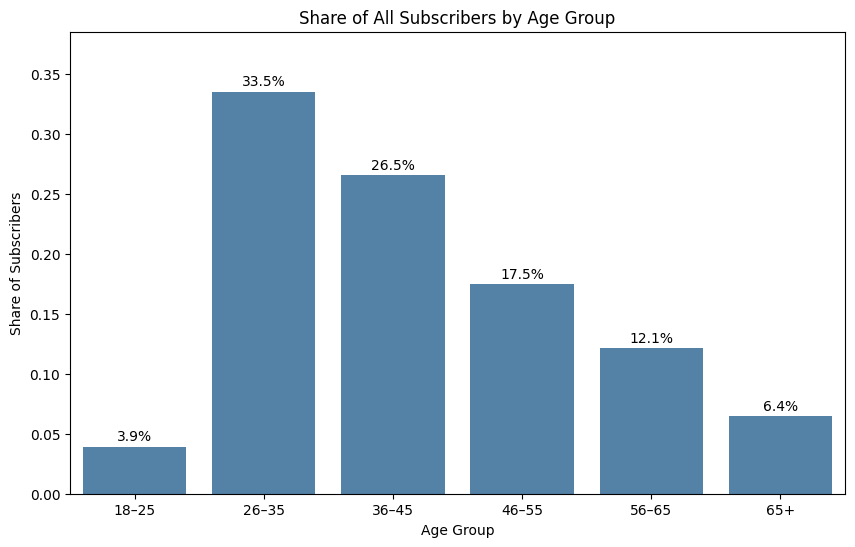

In [28]:
import pandas as pd

bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '65+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

subscriber_volume = (
    df[df['y'] == 'yes']['age_group']
    .value_counts(normalize=True)
    .sort_index()
)

print(subscriber_volume)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    x=subscriber_volume.index,
    y=subscriber_volume.values,
    color='steelblue'
)

plt.title("Share of All Subscribers by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Share of Subscribers")
plt.ylim(0, subscriber_volume.max() + 0.05)

# Add percentage labels
for i, v in enumerate(subscriber_volume.values):
    plt.text(i, v + 0.005, f"{v:.1%}", ha='center')

plt.show()


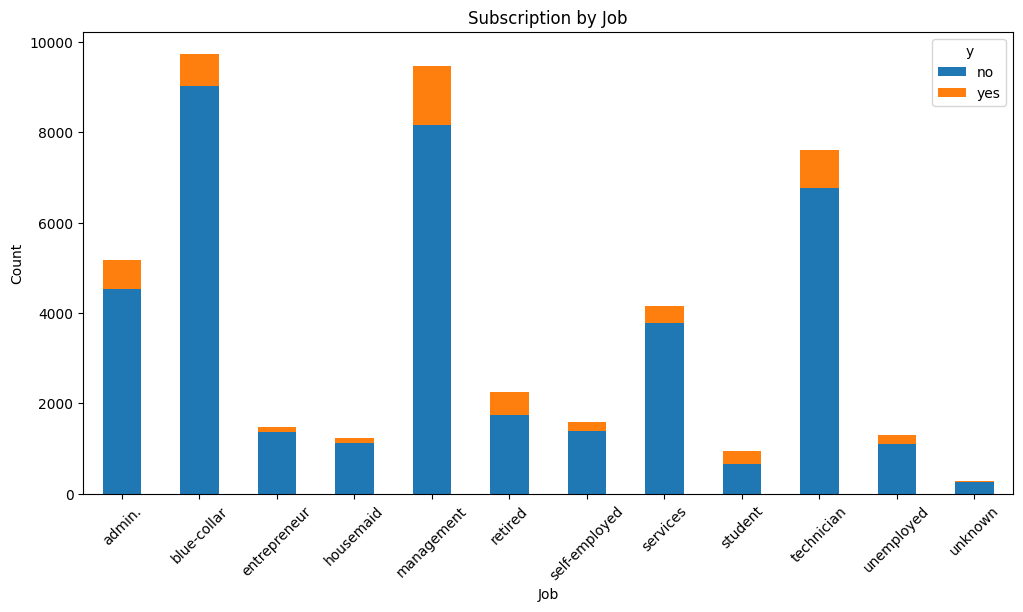

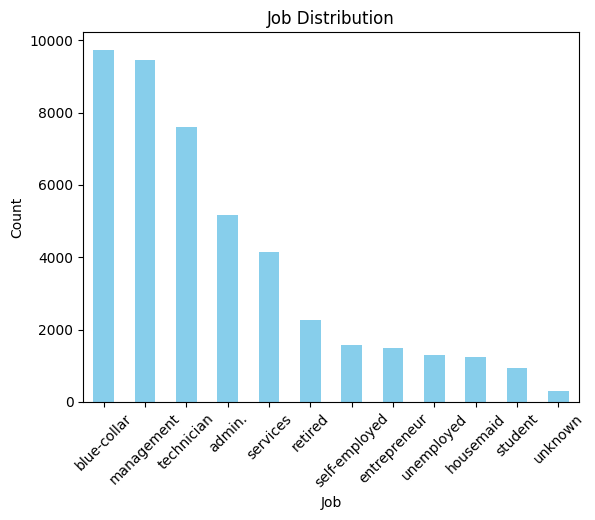

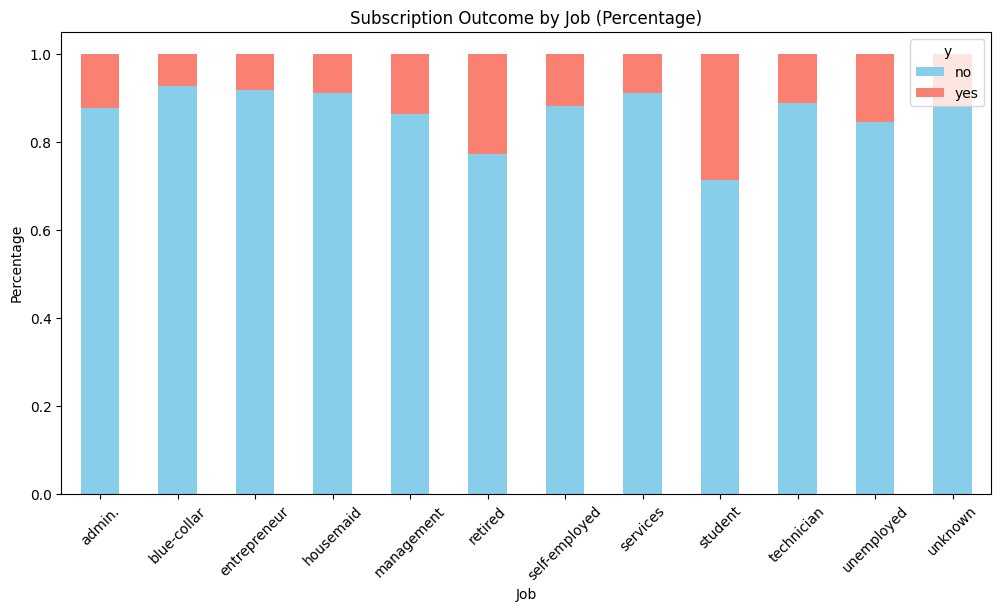

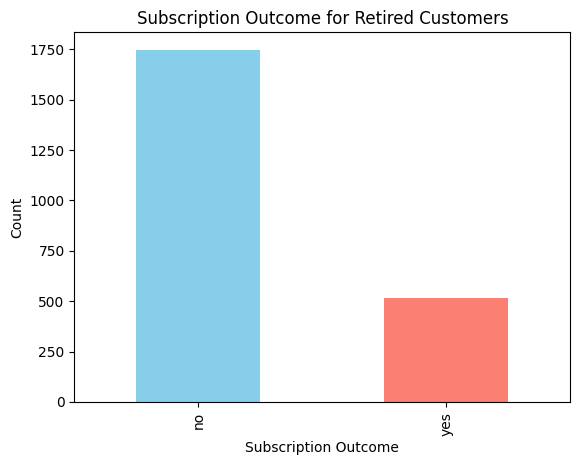

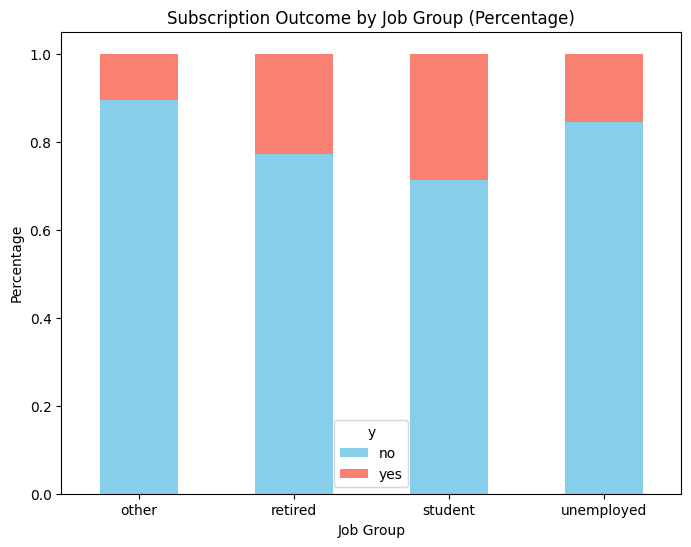

In [24]:
# are retired customers more likely to subscribe?

# Subscription by Job
pd.crosstab(df['job'], df['y']).plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Subscription by Job")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# job distribution
df['job'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Job Distribution")
plt.xlabel("Job")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# by percentage distribution of subscription outcome by job
pd.crosstab(df['job'], df['y'], normalize='index').plot(kind='bar', stacked=True, figsize=(12,6), color=['skyblue','salmon'])
plt.title("Subscription Outcome by Job (Percentage)")
plt.xlabel("Job")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.show()

# Focus on retired customers
pd.crosstab(df['job'], df['y']).loc['retired'].plot(kind='bar', color=['skyblue','salmon'])
plt.title("Subscription Outcome for Retired Customers")
plt.xlabel("Subscription Outcome")
plt.ylabel("Count")
plt.show()

# if separate retired customers, students, unemployed, with other jobs (except unknown) and compare subscription rates
df['job_group'] = df['job'].apply(lambda x: 'retired' if x == 'retired' else ('student' if x == 'student' else ('unemployed' if x == 'unemployed' else 'other')))
pd.crosstab(df['job_group'], df['y'], normalize='index').plot(kind='bar', stacked=True, figsize=(8,6), color=['skyblue','salmon'])
plt.title("Subscription Outcome by Job Group (Percentage)")
plt.xlabel("Job Group")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.show()

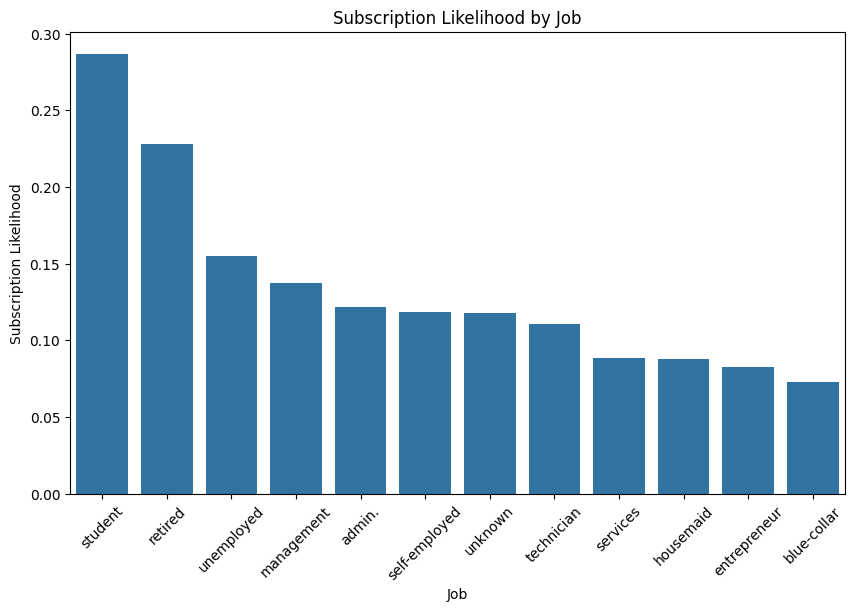

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y to binary
df['y_binary'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)

# Compute likelihood
likelihood = (
    df.groupby('job')['y_binary']
    .mean()
    .sort_values(ascending=False)
)

# Plot likelihood
plt.figure(figsize=(10,6))
sns.barplot(x=likelihood.index, y=likelihood.values)
plt.title("Subscription Likelihood by Job")
plt.xlabel("Job")
plt.ylabel("Subscription Likelihood")
plt.xticks(rotation=45)
plt.show()

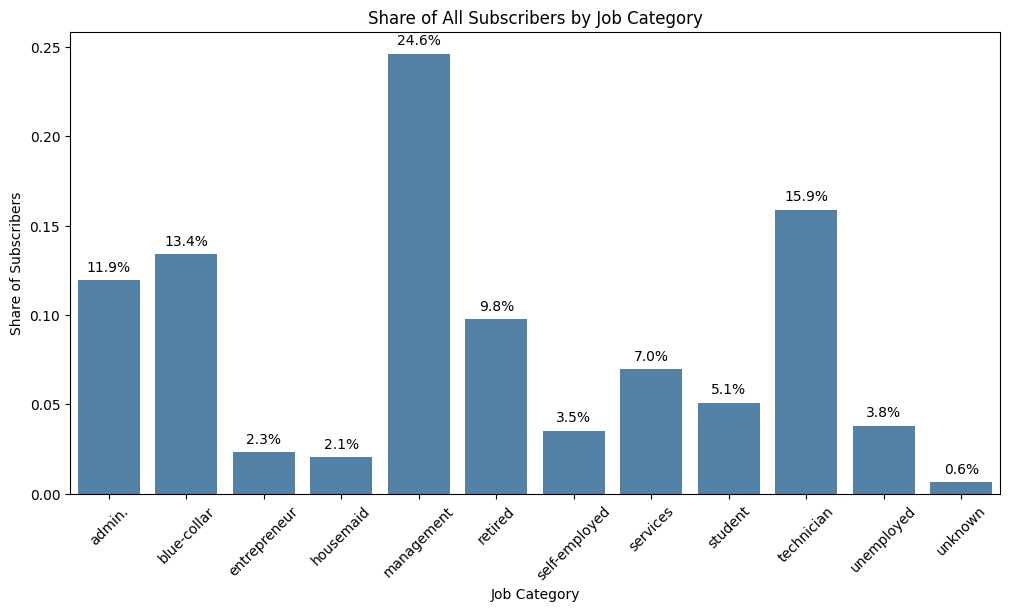

In [32]:
# Compute volume
volume = (
    df[df['y']=='yes']['job']
    .value_counts(normalize=True)
    .sort_index()
)

# Plot volume
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x=volume.index,
    y=volume.values,
    color="steelblue"
)

plt.title("Share of All Subscribers by Job Category")
plt.xlabel("Job Category")
plt.ylabel("Share of Subscribers")
plt.xticks(rotation=45)

# Add percentage labels
for i, v in enumerate(volume.values):
    plt.text(i, v + 0.005, f"{v:.1%}", ha='center')

plt.show()



C:\Users\papak\AppData\Local\Temp\ipykernel_29264\3976505843.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df.pivot_table(


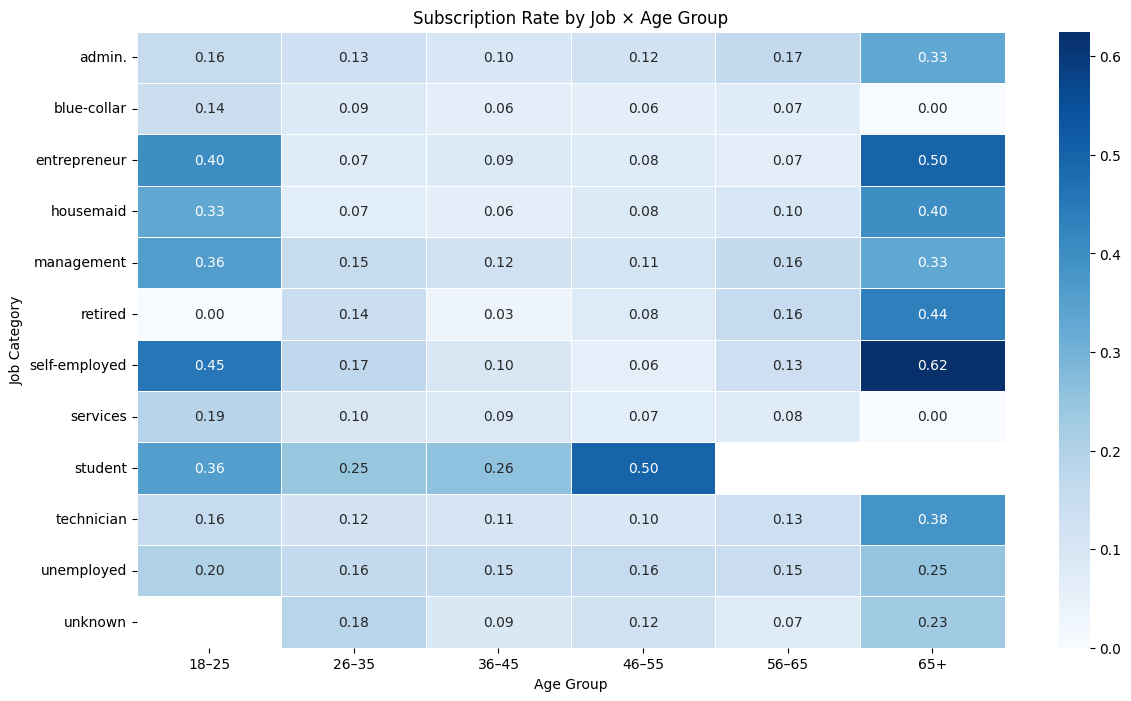

In [33]:
# two-way heatmap of job vs age group vs subscription rate
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Convert y to binary
df['y_binary'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)

# Pivot table for heatmap
heatmap_data = df.pivot_table(
    values='y_binary',
    index='job',
    columns='age_group',
    aggfunc='mean'
)

plt.figure(figsize=(14,8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    linewidths=.5
)

plt.title("Subscription Rate by Job × Age Group")
plt.xlabel("Age Group")
plt.ylabel("Job Category")
plt.show()


In [36]:
#sample size for each job × age group table
import pandas as pd

# Create age groups (same bins you used before)
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Count sample size for each job × age group
sample_size = df.pivot_table(
    values='y',
    index='job',
    columns='age_group',
    aggfunc='count',
    fill_value=0
)

print(sample_size)


C:\Users\papak\AppData\Local\Temp\ipykernel_29264\3904388001.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sample_size = df.pivot_table(


age_group      18–25  26–35  36–45  46–55  56–65  65+
job                                                  
admin.            90   1842   1691   1143    393   12
blue-collar      147   2967   3486   2401    725    6
entrepreneur       5    341    557    416    162    6
housemaid          6    188    336    395    285   30
management        39   3131   3264   2051    931   42
retired            1      7     59    282   1240  675
self-employed     11    493    556    370    141    8
services          86   1529   1394    880    264    1
student          327    549     58      4      0    0
technician        82   2740   2620   1613    529   13
unemployed        15    379    449    298    158    4
unknown            0     38     64    105     68   13


C:\Users\papak\AppData\Local\Temp\ipykernel_29264\2295361128.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


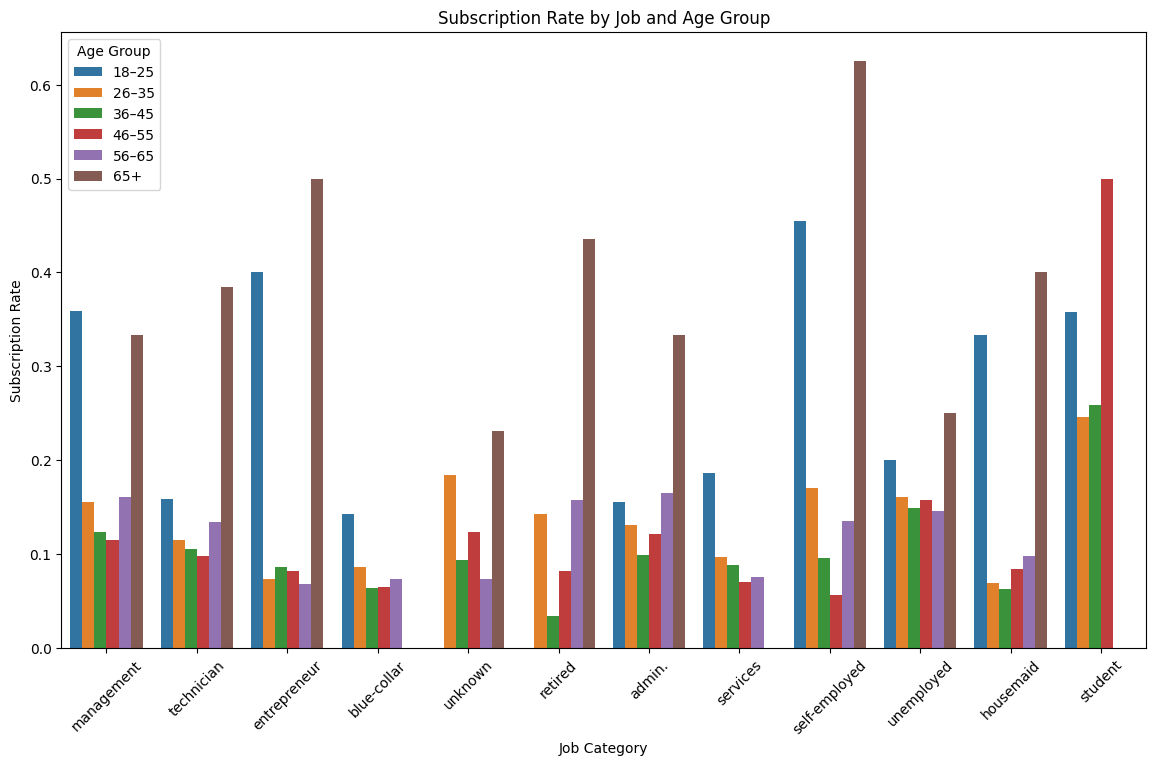

In [34]:
# grouped barplot (job on x-axis, subscription rate on y-axis, grouped by age group
plt.figure(figsize=(14,8))
sns.barplot(
    data=df,
    x='job',
    y='y_binary',
    hue='age_group',
    ci=None
)

plt.title("Subscription Rate by Job and Age Group")
plt.xlabel("Job Category")
plt.ylabel("Subscription Rate")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.show()


C:\Users\papak\AppData\Local\Temp\ipykernel_29264\1246781438.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  likelihood = df.pivot_table(
C:\Users\papak\AppData\Local\Temp\ipykernel_29264\1246781438.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sample_size = df.pivot_table(


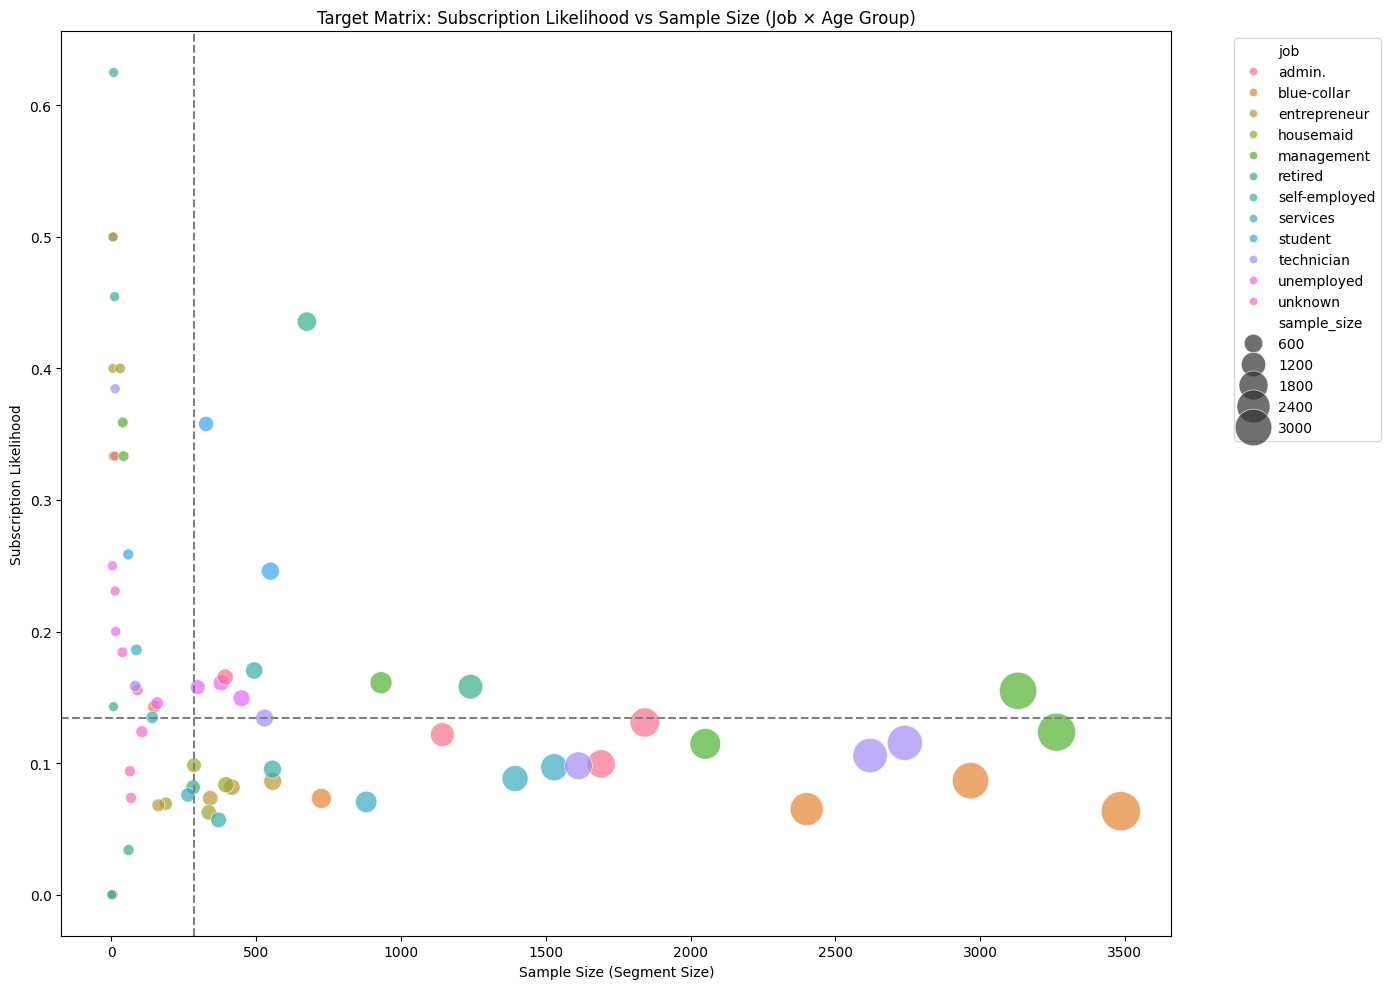

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Prepare data ---

# Age groups (same as before)
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Binary target
df['y_binary'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)

# Likelihood table
likelihood = df.pivot_table(
    values='y_binary',
    index='job',
    columns='age_group',
    aggfunc='mean'
)

# Sample size table
sample_size = df.pivot_table(
    values='y',
    index='job',
    columns='age_group',
    aggfunc='count',
    fill_value=0
)

# Melt both tables into long format
likelihood_long = likelihood.reset_index().melt(id_vars='job', var_name='age_group', value_name='likelihood')
sample_long = sample_size.reset_index().melt(id_vars='job', var_name='age_group', value_name='sample_size')

# Merge likelihood + sample size
merged = pd.merge(likelihood_long, sample_long, on=['job', 'age_group'])

# Remove rows with missing likelihood (e.g., empty cells)
merged = merged.dropna(subset=['likelihood'])

# --- Plot target matrix ---

plt.figure(figsize=(14,10))

ax = sns.scatterplot(
    data=merged,
    x='sample_size',
    y='likelihood',
    hue='job',
    size='sample_size',
    sizes=(50, 800),
    alpha=0.7
)

plt.title("Target Matrix: Subscription Likelihood vs Sample Size (Job × Age Group)")
plt.xlabel("Sample Size (Segment Size)")
plt.ylabel("Subscription Likelihood")

# Add quadrant reference lines
plt.axhline(merged['likelihood'].median(), color='grey', linestyle='--')
plt.axvline(merged['sample_size'].median(), color='grey', linestyle='--')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
#above but plotly
import pandas as pd
import plotly.express as px

# --- Prepare data ---

# Age groups (same as before)
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Binary target
df['y_binary'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)

# Likelihood table
likelihood = df.pivot_table(
    values='y_binary',
    index='job',
    columns='age_group',
    aggfunc='mean'
)

# Sample size table
sample_size = df.pivot_table(
    values='y',
    index='job',
    columns='age_group',
    aggfunc='count',
    fill_value=0
)

# Melt both tables into long format
likelihood_long = likelihood.reset_index().melt(id_vars='job', var_name='age_group', value_name='likelihood')
sample_long = sample_size.reset_index().melt(id_vars='job', var_name='age_group', value_name='sample_size')

# Merge likelihood + sample size
merged = pd.merge(likelihood_long, sample_long, on=['job', 'age_group'])

# Remove rows with missing likelihood
merged = merged.dropna(subset=['likelihood'])

# --- Interactive scatter plot ---

fig = px.scatter(
    merged,
    x='sample_size',
    y='likelihood',
    color='job',
    size='sample_size',
    hover_name='job',
    hover_data={
        'age_group': True,
        'sample_size': True,
        'likelihood': ':.2f'
    },
    title="Interactive Target Matrix: Subscription Likelihood vs Sample Size (Job × Age Group)",
    labels={
        'sample_size': 'Sample Size (Segment Size)',
        'likelihood': 'Subscription Likelihood'
    },
    size_max=40
)

# Add quadrant reference lines
fig.add_hline(y=merged['likelihood'].median(), line_dash="dash", line_color="gray")
fig.add_vline(x=merged['sample_size'].median(), line_dash="dash", line_color="gray")

fig.update_layout(
    width=1000,
    height=700,
    legend_title_text="Job Category"
)

fig.show()



C:\Users\papak\AppData\Local\Temp\ipykernel_29264\2701689806.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  likelihood = df.pivot_table(
C:\Users\papak\AppData\Local\Temp\ipykernel_29264\2701689806.py:24: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sample_size = df.pivot_table(


In [40]:
fig.write_html("target_matrix.html", auto_open=True)


C:\Users\papak\AppData\Local\Temp\ipykernel_29264\662893356.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




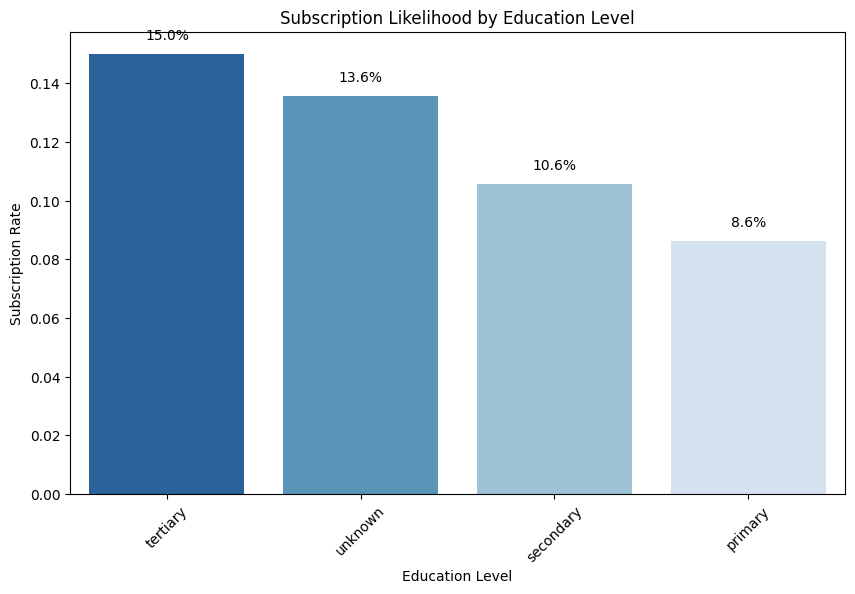

In [41]:
# does a customer's education level affect their likelihood to subscribe?

#subscription likelihood by education level
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y to binary
df['y_binary'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)

# Likelihood by education
edu_likelihood = (
    df.groupby('education')['y_binary']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=edu_likelihood.index,
    y=edu_likelihood.values,
    palette="Blues_r"
)

plt.title("Subscription Likelihood by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Subscription Rate")
plt.xticks(rotation=45)

for i, v in enumerate(edu_likelihood.values):
    plt.text(i, v + 0.005, f"{v:.1%}", ha='center')

plt.show()


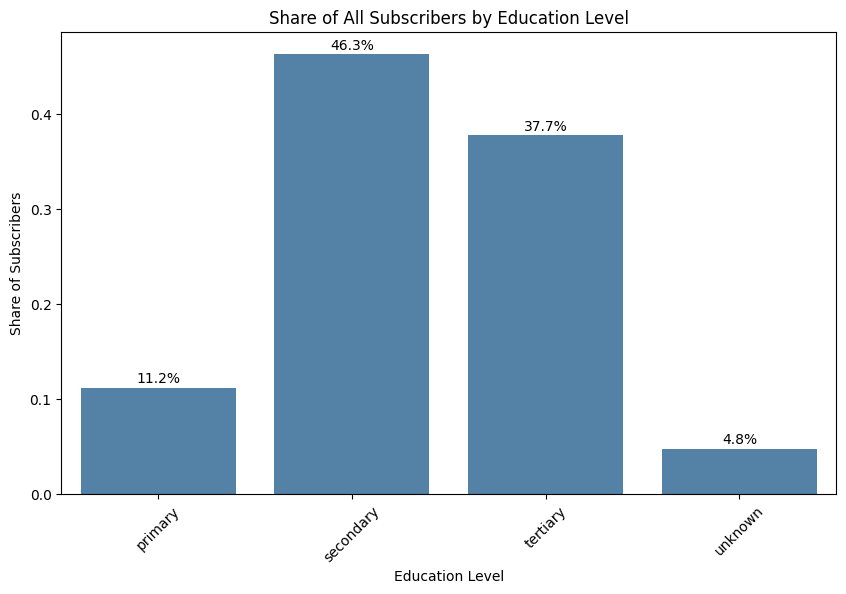

In [42]:
#Volume of subscribers by education level
edu_volume = (
    df[df['y']=='yes']['education']
    .value_counts(normalize=True)
    .sort_index()
)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=edu_volume.index,
    y=edu_volume.values,
    color="steelblue"
)

plt.title("Share of All Subscribers by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Share of Subscribers")
plt.xticks(rotation=45)

for i, v in enumerate(edu_volume.values):
    plt.text(i, v + 0.005, f"{v:.1%}", ha='center')

plt.show()


C:\Users\papak\AppData\Local\Temp\ipykernel_29264\1658441863.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




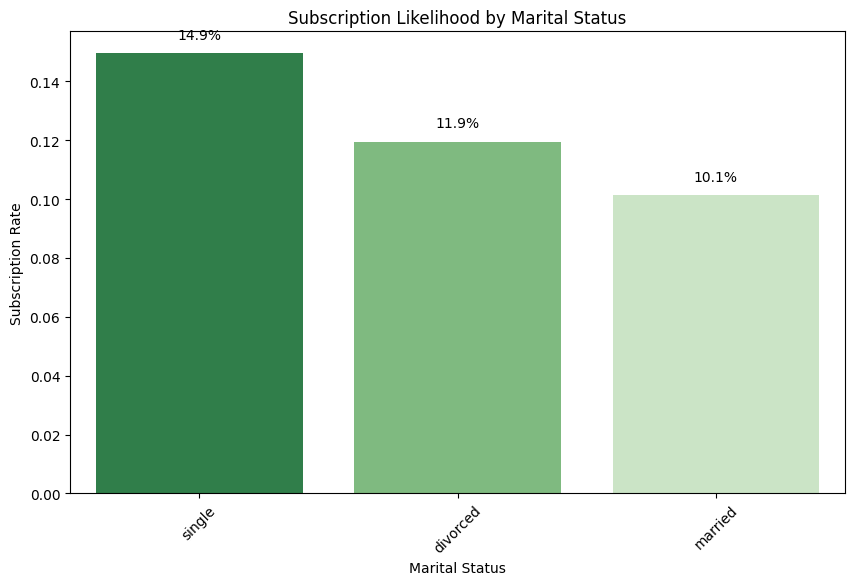

In [43]:
# Marital Status: likelihood
marital_likelihood = (
    df.groupby('marital')['y_binary']
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=marital_likelihood.index,
    y=marital_likelihood.values,
    palette="Greens_r"
)

plt.title("Subscription Likelihood by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Subscription Rate")
plt.xticks(rotation=45)

for i, v in enumerate(marital_likelihood.values):
    plt.text(i, v + 0.005, f"{v:.1%}", ha='center')

plt.show()


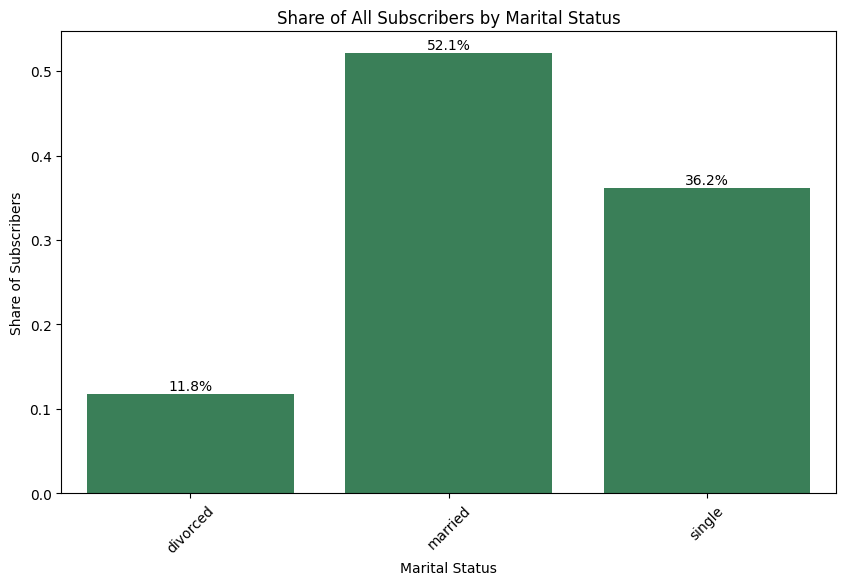

In [44]:
#Volume for marital status
marital_volume = (
    df[df['y']=='yes']['marital']
    .value_counts(normalize=True)
    .sort_index()
)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=marital_volume.index,
    y=marital_volume.values,
    color="seagreen"
)

plt.title("Share of All Subscribers by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Share of Subscribers")
plt.xticks(rotation=45)

for i, v in enumerate(marital_volume.values):
    plt.text(i, v + 0.005, f"{v:.1%}", ha='center')

plt.show()


In [50]:
segment = df.groupby(['age_group', 'job', 'education', 'marital']).agg(
    likelihood=('y_binary', 'mean'),
    volume=('y_binary', 'sum'),
    sample_size=('y_binary', 'count')
).reset_index()

# compute priority score = likelihood × log(sample size) to identify high-likelihood segments with sufficient sample size for targeting
import numpy as np
segment['priority_score'] = segment['likelihood'] * np.log(segment['sample_size'] + 1)

#filter out unstable segment
segment = segment[segment['sample_size'] >= 50]

# visualize combined segments with interactive scatter plot (x=sample size, y=likelihood, size=priority score, color=job) to identify high-value segments across age × job × education × marital
import plotly.express as px

fig = px.scatter(
    segment,
    x='sample_size',
    y='likelihood',
    size='priority_score',
    color='job',
    hover_data=['age_group', 'education', 'marital', 'sample_size', 'likelihood'],
    title="High-Value Segments Across Age × Job × Education × Marital",
    labels={'sample_size': 'Segment Size', 'likelihood': 'Subscription Rate'}
)

fig.update_layout(height=700)
fig.show()






C:\Users\papak\AppData\Local\Temp\ipykernel_29264\1617470651.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [49]:
import pandas as pd
import numpy as np
import plotly.express as px

# --- Prepare data ---

# Age groups
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Binary target
df['y_binary'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)

# Group by all 4 demographic factors
segment = df.groupby(['age_group', 'job', 'education', 'marital']).agg(
    likelihood=('y_binary', 'mean'),
    volume=('y_binary', 'sum'),
    sample_size=('y_binary', 'count')
).reset_index()

# Remove tiny segments (unstable)
segment = segment[segment['sample_size'] >= 50]

# Priority score = likelihood × log(sample size)
segment['priority_score'] = segment['likelihood'] * np.log(segment['sample_size'] + 1)

# --- Compute quadrant thresholds ---
likelihood_threshold = segment['likelihood'].median()
sample_threshold = segment['sample_size'].median()

# --- Interactive scatter plot ---
fig = px.scatter(
    segment,
    x='sample_size',
    y='likelihood',
    size='priority_score',
    color='job',
    hover_data=['age_group', 'education', 'marital', 'sample_size', 'likelihood'],
    title="High-Value Segments Across Age × Job × Education × Marital",
    labels={'sample_size': 'Segment Size', 'likelihood': 'Subscription Rate'},
    size_max=40
)

# Add quadrant lines
fig.add_hline(y=likelihood_threshold, line_dash="dash", line_color="gray")
fig.add_vline(x=sample_threshold, line_dash="dash", line_color="gray")

fig.update_layout(height=750)
fig.show()

C:\Users\papak\AppData\Local\Temp\ipykernel_29264\1066911195.py:16: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

